In [1]:
import pandas as pd
import random
from Bio import SeqIO
import sys
sys.path.insert(1, '../')
from notebooks.preprocess import pfeature_process

In [11]:
seqs = pd.read_csv('./data/raw/vegf_augmented.csv')
seqs_positive = seqs[seqs['Label']==1]
seqs_positive

,Sequence,Label
0,RRKPGRGKRRREQKRP,1
1,RRPKRGGKRRERKQRPDCKPRR,1
2,RRKPGRKGRRREQKPRDSPKRR,1
3,RRPKRGGKRRERKQRPDAVPRR,1
4,KCGRKGRCREKQRPDSKPRR,1
...,...,...
263,KGRGKRAAEAQRPSDKPRR,1
264,AGRGARAAEAQRPSDKPRR,1
265,RRPKGRGKRRREKQRPSDAAAR,1
266,KSVRGKGKGQKRKRKKSRYK,1


In [12]:
def mutate_sequence(sequence, num_mutations=1):
    """Apply random mutations (substitution, insertion, deletion) to a peptide sequence."""
    amino_acids = "ACDEFGHIKLMNPQRSTVWY"  # Standard amino acids
    sequence = list(sequence)
    
    for _ in range(num_mutations):
        mutation_type = random.choice(["substitution", "insertion", "deletion"])
        idx = random.randint(0, len(sequence) - 1)
        
        if mutation_type == "substitution":
            sequence[idx] = random.choice(amino_acids)
        elif mutation_type == "insertion":
            sequence.insert(idx, random.choice(amino_acids))
        elif mutation_type == "deletion" and len(sequence) > 1:
            sequence.pop(idx)
    
    return "".join(sequence)

In [ ]:
augmented_data = []
for index, row in df_augmented.iterrows():
    for _ in range(5):  # Generate 5 variations per sequence
        new_seq = mutate_sequence(row["Sequence"], num_mutations=5)
        augmented_data.append((new_seq, row["Label"]))

# Create augmented DataFrame
df_augmented = pd.DataFrame(augmented_data, columns=["Sequence", "Label"])
df_augmented

,Sequence,Label
0,NRKPGRCGKRRHRHENP,1
1,NRRPGEGKRRRHENP,1
2,RRKIQGRKRRHEN,1
3,MRPGRGKRRRHNP,1
4,RRLCRGKRHENP,1
...,...,...
6695,NGKISLDALYQKICIKYKLLES,1
6696,NGMESLDRALYKWIIKKLHES,1
6697,NGAKIMSLPRALYIPKKIVKKLLES,1
6698,NGKCIMSLDMALKSIIQKKLLES,1


In [16]:
df_augmented.drop_duplicates(subset=['Sequence'], inplace=True)
df_augmented

,Sequence,Label
0,NRKPGRCGKRRHRHENP,1
1,NRRPGEGKRRRHENP,1
2,RRKIQGRKRRHEN,1
3,MRPGRGKRRRHNP,1
4,RRLCRGKRHENP,1
...,...,...
6695,NGKISLDALYQKICIKYKLLES,1
6696,NGMESLDRALYKWIIKKLHES,1
6697,NGAKIMSLPRALYIPKKIVKKLLES,1
6698,NGKCIMSLDMALKSIIQKKLLES,1


In [ ]:
seqs = pd.read_csv('./data/raw/vegf_augmented.csv')

In [17]:
df_augmented = pd.concat([df_augmented, seqs[seqs['Label']==0]], axis = 0, ignore_index=True)
df_augmented

,Sequence,Label
0,NRKPGRCGKRRHRHENP,1
1,NRRPGEGKRRRHENP,1
2,RRKIQGRKRRHEN,1
3,MRPGRGKRRRHNP,1
4,RRLCRGKRHENP,1
...,...,...
9381,ACSHSGWGCGHGSWSCGRRRRRRRR,0
9382,ACHGRRWGCGRHRGRCG,0
9383,GLFGCGRKKRRQRRRPPQ,0
9384,KRRRRRRRRRE,0


array([[<Axes: title={'center': 'Label'}>]], dtype=object)

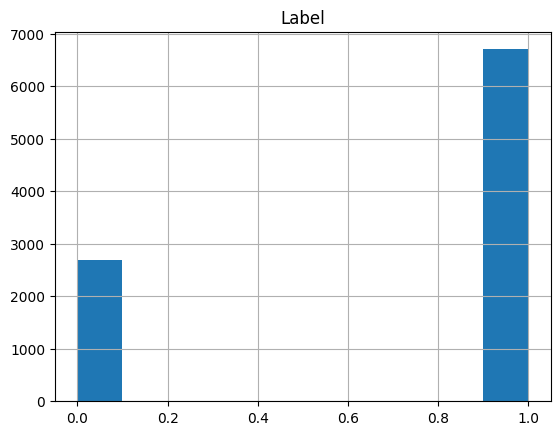

In [18]:
df_augmented.hist()

In [19]:
df_augmented.to_csv('./data/vegf_augmented.csv', index = False)

In [3]:
df_augmented = pd.read_csv('../data/vegf_augmented.csv')

In [5]:
with open('../data/processed/VEGF_augmented.fasta','w', encoding='UTF8') as f:
    for _, row in df_augmented.iterrows():
        f.write(f">{row['Label']}\n{row['Sequence']}\n")

In [6]:
#Ejecutar cd-hit en colab, para windows usar el comando con wsl
#! cd-hit -i data/processed/VEGF.fasta -o data/processed/VEGF.txt -c 0.99

import subprocess

# Define the WSL command buscar 
command = ["wsl", "cd-hit", "-i", "../data/processed/VEGF_augmented.fasta", "-o", "../data/processed/VEGF_augmented.txt", "-c", "0.99"]

# Run the command
result = subprocess.run(command, capture_output=True, text=True)

# Print the output and errors
print("STDOUT:", result.stdout)
print("STDERR:", result.stderr)


STDOUT: ================================================================
Program: CD-HIT, V4.8.1 (+OpenMP), Aug 20 2021, 08:39:56
Command: cd-hit -i ../data/processed/VEGF_augmented.fasta -o
         ../data/processed/VEGF_augmented.txt -c 0.99

Started: Fri Feb 21 13:01:18 2025
                            Output                              
----------------------------------------------------------------
total seq: 8065
longest and shortest : 97 and 11
Total letters: 163387
Sequences have been sorted

Approximated minimal memory consumption:
Sequence        : 1M
Buffer          : 1 X 10M = 10M
Table           : 1 X 65M = 65M
Miscellaneous   : 0M
Total           : 77M

Table limit with the given memory limit:
Max number of representatives: 4000000
Max number of word counting entries: 90340183


comparing sequences from          0  to       8065
........
     8065  finished       8065  clusters

Approximated maximum memory consumption: 78M
writing new database
writing clustering inform

In [7]:
records_cd_hit = list(SeqIO.parse("../data/processed/VEGF_augmented.txt", "fasta"))
with open('../data/raw/VEGF_augmented_y.csv','w', encoding='UTF8') as f:
    f.write('Label\n')
    for record in records_cd_hit:
        f.write(f'{record.id} \n')

In [8]:
vegf_data = pfeature_process('../data/processed/VEGF_augmented.txt', '../data/processed/vegf_augmented_processed.csv')